In [2]:
import numpy as np
import sympy
import os
import pickle
from tqdm.notebook import tqdm

In [3]:
problems = [n for n in os.listdir('../datasets') if 'ipynb' not in n]
problems

['Feynman', 'Kamke', 'Nguyen', 'Strogatz', 'Univ']

## Natural Formulas

https://www.fxsolver.com/browse/?&p=0

In [13]:
def get_natural(N = 1000, seed = 0):
    np.random.seed(seed)
    problem_dict = {}
    
    # Dolbears Law:
    # https://www.fxsolver.com/browse/formulas/Dolbear%27s+Law+-++in+degrees+Celsius
    # y = 10 + (x - 40)/7
    if True:
        X = np.random.rand(N, 1)*100
        y = 10 + (X[:, 0] - 40)/7
        y = y.reshape(-1, 1)
        
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [10 + (X_symb[0] - 40)/7]
        problem_dict['dolbears_law'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
    
    # Alpha helix (rotational angle):
    # https://www.fxsolver.com/browse/formulas/Alpha+helix+%28rotational+angle%29
    # y_hat = 3*cos(y) = 1 - 4cos((x0 + x1)/2)**2
    if True:
        X = np.random.rand(N, 2)*360
        y = 1 - 4*np.cos((X[:, 0] + X[:, 1])/2)**2
        y = y.reshape(-1, 1)
        
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [1 - 4*sympy.cos((X_symb[0] + X_symb[1])/2)**2]
        problem_dict['alpha_helix'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
    
    
    # Hill Equation:
    # https://www.fxsolver.com/browse/formulas/Hill+equation
    # y = 1/(c/x + 1)
    if True:
        c = 0.4
        X = np.random.rand(N, 1)
        y = 1/((c/X[:, 0]) + 1)
        y = y.reshape(-1, 1)
        
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [1/((c/X_symb[0]) + 1)]
        problem_dict['hill_equation'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
    
    return problem_dict
    
        
task_dict = get_natural()

# saving
dirname = 'Natural'
if not os.path.exists(dirname):
    os.mkdir(dirname)
with open(f'{dirname}/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)
    
# sanity check
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])

    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')

dolbears_law, 3.552713678800501e-15
alpha_helix, 0.0
hill_equation, 0.0


In [5]:
x_values = np.arange(0, 100, 1)
y_values = 10 + (x_values - 40)/7

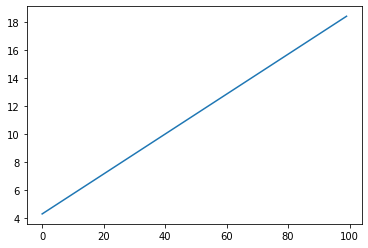

In [7]:
import matplotlib.pyplot as plt
plt.plot(x_values, y_values)

## Kamke


In [44]:
def get_kamke(N = 1000, seed = 0):
    np.random.seed(seed)
    problem_dict = {}
    
    # Problem Nr.2
    # y = x1 + exp(-x0)
    if True:
        t0, t1 = 0, 3
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [1.0, 2.0, -1.0, -2.0, -3.0]:
            y = (0.5*np.exp(t) + a*np.exp(-t)).reshape(-1, 1)
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        y = X[:, 1] + np.exp(-X[:, 0])
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [X_symb[1] + sympy.exp(-X_symb[0])]
        problem_dict['kamke2'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
       
    # Problem Nr.3
    # y = -2*x0*x1 + x0*exp(-x0^2)
    if True:
        t0, t1 = 0, 3
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [1.0, 2.0, -1.0, -2.0, -3.0]:
            y = np.column_stack([np.exp(-1 * t**2) * (t**2 / 2 + a)])
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        y = -2*X[:, 0]*X[:, 1] + X[:, 0]*np.exp(-X[:, 0]**2)
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [-2*X_symb[0]*X_symb[1] + X_symb[0]*sympy.exp(-X_symb[0]**2)]
        problem_dict['kamke4'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
    # Problem Nr.4
    # y = exp(-x0^2)*x0 - 2*x0x1
    if True:
        t0, t1 = 0, 3
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [1.0, 2.0, -1.0, -2.0, -3.0]:
            y = ((t**2/2 + a)*np.exp(-t**2)).reshape(-1, 1)
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        y = np.exp(-X[:, 0]**2)*X[:, 0] - 2*X[:, 0]*X[:, 1]
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [sympy.exp(-X_symb[0]**2)*X_symb[0] - 2*X_symb[0]*X_symb[1]]
        problem_dict['kamke4'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
    
    # Problem Nr.6
    # y = 0.5*sin(2x0) - x1*cos(x0)
    if True:
        t0, t1 = 0, 3
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [1.0, 2.0, -1.0, -2.0, -3.0]:
            y = (a*np.exp(-np.sin(t)) + np.sin(t) - 1).reshape(-1, 1)
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        y = 0.5*np.sin(2*X[:, 0]) - X[:, 1]*np.cos(X[:, 0])
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [0.5*sympy.sin(2*X_symb[0]) - X_symb[1]*sympy.cos(X_symb[0])]
        problem_dict['kamke6'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
    # Problem Nr.12
    # y = x1**2 - 1
    if True:
        t0, t1 = -1, 1
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [1.0, 2.0, -1.0, -2.0, -3.0]:
            y = (np.tanh(a + t)).reshape(-1, 1)
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        y = X[:, 1]**2 - 1
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [X_symb[1]**2 - 1]
        problem_dict['kamke12'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
        
    # Problem Nr.17
    # y = x1^2 + 3*x1 + 4
    if True:
        t0, t1 = 0, 1
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [1.0, 2.0, 3.0, 0.5, 0.1]:
            y = np.column_stack([(-4*a*np.exp(5*t) + 1)/(a*np.exp(5*t) + 1)])
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        
        y = X[:, 1]**2 + 3*X[:, 1] + 4
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [X_symb[1]**2 + 3*X_symb[1] + 4]
        problem_dict['kamke17'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
    # Problem Nr.19
    # y = (x0 + x1)**2
    if True:
        t0, t1 = 0, 1
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [0.0, -0.1, 0.1, -0.2, 0.2]:
            y = (-t - np.tan(a - t)).reshape(-1, 1)
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        
        y = (X[:, 0] + X[:, 1])**2
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [(X_symb[0] + X_symb[1])**2]
        problem_dict['kamke19'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
    # Problem Nr.75
    # y = exp(x0 - x1) - exp(-x0)
    if True:
        t0, t1 = 0.5, 1.0
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [-1.0, -2.0, -3.0, 4.0, 5.0]:
            y = np.column_stack([np.log(1 - a*np.exp(-1 * np.exp(t)))])
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        
        y = np.exp(X[:, 0] - X[:, 1]) - np.exp(-X[:, 0])
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [sympy.exp(X_symb[0] - X_symb[1]) - sympy.exp(-X_symb[0])]
        problem_dict['kamke75'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
    # Problem Nr.90
    # y = (x0sin(x0) - x1)/x0
    if True:
        t0, t1 = 1, 2
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [0.0, -0.1, 0.1, -0.2, 0.2]:
            y = ((np.sin(t) - t*np.cos(t))/t + a/t).reshape(-1, 1)
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        
        y = (X[:, 0]*np.sin(X[:, 0]) - X[:, 1])/X[:, 0]
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [(X_symb[0]*sympy.sin(X_symb[0]) - X_symb[1])/X_symb[0]]
        problem_dict['kamke90'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
    # Problem Nr. 302
    # y = -x1/(x0^2*x1^2 + x0)
    if True:
        t0, t1 = 2, 3
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [1.0, 2.0, 3.0, 4.0, 5.0]:
            y = np.column_stack([a + np.sqrt((1 + a*t) / t)])
            #y = np.column_stack([(a*t - np.sqrt(t)*np.sqrt(4 + a**2*t))/(2*t)])
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        
        y = -X[:, 1]/(X[:, 0]**2*X[:, 1]**2 + X[:, 0])
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [-X_symb[1]/(X_symb[0]**2*X_symb[1]**2 + X_symb[0])]
        problem_dict['kamke302'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
        
    # Problem Nr.651
    # y = (log(x1) + x0^2)*x1/x0
    if True:

        t0, t1 = -1.0, 1.0
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [-1.0, -0.5, 0.0, 0.5, 1.0]:
            y = np.column_stack([np.exp(t**2 + a*t)])
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        
        y = (np.log(X[:, 1]) + X[:, 0]**2)*X[:, 1]/X[:, 0]
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [(sympy.log(X_symb[1]) + X_symb[0]**2)*X_symb[1]/X_symb[0]]
        problem_dict['kamke651'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }

    

    # Problem Nr.242
    # y = -x1/x0 - 1/(2*x0*x1)
    if True:
        t0, t1 = 1.0, 2.0
        # exact time series
        Y = []
        T = []
        t = np.linspace(t0, t1, N//5)
        for a in [20.0, 25.0, 30.0, 35.0, 40.0]: # need a > 20
            y = np.column_stack([np.sqrt(4*a - 2*t**2) / (2*t)])
            Y.append(y)
            T.append(t)
        y = np.concatenate(Y)
        t = np.concatenate(T)
        X = np.column_stack([t, y])
        
        y = -X[:, 1]/X[:, 0] - 1/(2*X[:, 0]*X[:, 1])
        y = np.expand_dims(y, axis=1)

        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [-X_symb[1]/X_symb[0] - 1/(2*X_symb[0]*X_symb[1])]
        problem_dict['kamke242'] = {
            'X' : X.copy(),
            'y' : y.copy(),
            'expr' : y_symb
        }
            
    


    return problem_dict

In [45]:
task_dict = get_kamke()

# saving
dirname = 'Kamke'
if not os.path.exists(dirname):
    os.mkdir(dirname)
with open(f'{dirname}/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

In [46]:
# sanity check
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])

    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')

kamke2, 0.0
kamke4, 0.0
kamke6, 0.0
kamke12, 0.0
kamke17, 0.0
kamke19, 0.0
kamke75, 0.0
kamke90, 0.0
kamke302, 0.0
kamke651, 0.0
kamke242, 0.0


## Univariate Problems

For comparing ESR to DAGSearch

Symbolic Regression problems as collected here: https://dl.acm.org/doi/pdf/10.1145/2330163.2330273

In [88]:
task_dict = {
    'Koza-1' : None,
    'Koza-2' : None,
    'Koza-3' : None,
    'Nguyen-1' : None,
    'Nguyen-2' : None,
    'Nguyen-3' : None,
    'Nguyen-4' : None,
    'Nguyen-8' : None,
    'Korns-1' : None,
    'Korns-6' : None,
}

task_dict_ds = get_koza(0)
for problem in task_dict:
    if problem in task_dict_ds:
        assert task_dict_ds[problem]['X'].shape[1] == 1, problem
        task_dict[problem] = task_dict_ds[problem]

task_dict_ds = get_nguyen(0)
for problem in task_dict:
    if problem in task_dict_ds:
        assert task_dict_ds[problem]['X'].shape[1] == 1, problem
        task_dict[problem] = task_dict_ds[problem]

        
task_dict_ds = get_korns(0, all_vars = False)
for problem in task_dict:
    if problem in task_dict_ds:
        assert task_dict_ds[problem]['X'].shape[1] == 1, problem
        task_dict[problem] = task_dict_ds[problem]
        
# sanity check
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])
    
    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')

Koza-1, 0.0
Koza-2, 0.0
Koza-3, 0.0
Nguyen-1, 0.0
Nguyen-2, 0.0
Nguyen-3, 0.0
Nguyen-4, 0.0
Nguyen-8, 0.0
Korns-1, 0.0
Korns-6, 0.0


In [89]:
# saving
dirname = 'Univ'
if not os.path.exists(dirname):
    os.mkdir(dirname)
with open(f'{dirname}/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

## Keijzer Problems

In [71]:
def get_keijzer(seed=None):
    if seed is not None:
        np.random.seed(seed)
    ds_keijzer = {}

    
    # Keijzer1
    X = np.arange(-1, 1, 0.1)
    X = np.column_stack([X])
    y = 0.3*X[:, 0]*np.sin(2*np.pi*X[:, 0]) 
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [0.3*X_symb[0]*sympy.sin(2*np.pi*X_symb[0]) ]
    ds_keijzer['Keijzer-1'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer2
    X = np.arange(-2, 2, 0.1)
    X = np.column_stack([X])
    y = 0.3*X[:, 0]*np.sin(2*np.pi*X[:, 0]) 
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [0.3*X_symb[0]*sympy.sin(2*np.pi*X_symb[0]) ]
    ds_keijzer['Keijzer-2'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer3
    X = np.arange(-3, 3, 0.1)
    X = np.column_stack([X])
    y = 0.3*X[:, 0]*np.sin(2*np.pi*X[:, 0]) 
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [0.3*X_symb[0]*sympy.sin(2*np.pi*X_symb[0]) ]
    ds_keijzer['Keijzer-3'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer4
    X = np.arange(0, 10, 0.05)
    X = np.column_stack([X])
    y = X[:, 0]**3*np.exp(-X[:, 0])*np.cos(X[:, 0])*np.sin(X[:, 0])*(np.sin(X[:, 0])**2*np.cos(X[:, 0]) - 1)
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [X_symb[0]**3*sympy.exp(-X_symb[0])*sympy.cos(X_symb[0])*sympy.sin(X_symb[0])*(sympy.sin(X_symb[0])**2*sympy.cos(X_symb[0]) - 1)]
    ds_keijzer['Keijzer-4'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer5
    X0 = np.random.rand(1000)*2-1
    X1 = np.random.rand(1000)*2-1
    X2 = np.random.rand(1000) + 1
    X = np.column_stack([X0, X1, X2])
    y = 30*X[:, 0]*X[:, 2]/((X[:, 0] - 10)*X[:, 1]**2)
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [30*X_symb[0]*X_symb[2]/((X_symb[0] - 10)*X_symb[1]**2)]
    ds_keijzer['Keijzer-5'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer6
    X = np.arange(1, 50, 1)
    X = np.column_stack([X])
    y = np.array([np.sum(1/X[:i]) for i in range(len(X))])
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [sympy.log(X_symb[0]) + 0.577] # approximation using eulers constant
    ds_keijzer['Keijzer-6'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer7
    X = np.arange(1, 100, 1)
    X = np.column_stack([X])
    y = np.log(X[:, 0])
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [sympy.log(X_symb[0])]
    ds_keijzer['Keijzer-7'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer8
    X = np.arange(0, 100, 1)
    X = np.column_stack([X])
    y = np.sqrt(X[:, 0])
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [sympy.sqrt(X_symb[0])]
    ds_keijzer['Keijzer-8'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer9
    X = np.arange(0, 100, 1)
    X = np.column_stack([X])
    y = np.log(X[:, 0] + np.sqrt(X[:, 0]**2 + 1))
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [sympy.log(X_symb[0] + sympy.sqrt(X_symb[0]**2 + 1))]
    ds_keijzer['Keijzer-9'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer10
    X = np.random.rand(100, 2)
    y = X[:, 0]**X[:, 1]
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [X_symb[0]**X_symb[1]]
    ds_keijzer['Keijzer-10'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    
    # Keijzer11
    X = np.random.rand(20, 2)*6-3
    y = X[:, 0]*X[:, 1] + np.sin((X[:, 0] - 1)*(X[:, 1] - 1))
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [X_symb[0]*X_symb[1] + sympy.sin((X_symb[0] - 1)*(X_symb[1] - 1))]
    ds_keijzer['Keijzer-11'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer12
    X = np.random.rand(20, 2)*6-3
    y = X[:, 0]**4 - X[:, 0]**3 + 0.5*X[:, 1]**2 - X[:, 1]
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [X_symb[0]**4 - X_symb[0]**3 + 0.5*X_symb[1]**2 - X_symb[1]]
    ds_keijzer['Keijzer-12'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer13
    X = np.random.rand(20, 2)*6-3
    y = 6*np.sin(X[:, 0])*np.cos(X[:, 1])
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [6*sympy.sin(X_symb[0])*sympy.cos(X_symb[1])]
    ds_keijzer['Keijzer-13'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer14
    X = np.random.rand(20, 2)*6-3
    y = 8/(2 + X[:, 0]**2 + X[:, 1]**2)
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [8/(2 + X_symb[0]**2 + X_symb[1]**2)]
    ds_keijzer['Keijzer-14'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Keijzer15
    X = np.random.rand(20, 2)*6-3
    y = 0.2*X[:, 0]**3 + 0.5*X[:, 1]**3 - X[:, 0] - X[:, 1]
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [0.2*X_symb[0]**3 + 0.5*X_symb[1]**3 - X_symb[0] - X_symb[1]]
    ds_keijzer['Keijzer-15'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
   
    
    return ds_keijzer

# sanity check
task_dict = get_keijzer(0)
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])
    
    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')

Keijzer-1, 1.0658141036401502e-15
Keijzer-2, 4.263256414560601e-15
Keijzer-3, 9.592326932761352e-15
Keijzer-4, 2.220446049250313e-16
Keijzer-5, 0.0
Keijzer-6, 0.577
Keijzer-7, 0.0
Keijzer-8, 0.0
Keijzer-9, 0.0
Keijzer-10, 0.0
Keijzer-11, 0.0
Keijzer-12, 0.0
Keijzer-13, 0.0
Keijzer-14, 1.1102230246251565e-16
Keijzer-15, 4.440892098500626e-16


In [ ]:
# saving
task_dict = get_keijzer(0)
dirname = 'Keijzer'
if not os.path.exists(dirname):
    os.mkdir(dirname)
with open(f'{dirname}/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

## Korns Problems

In [77]:
def get_korns(seed=None, all_vars = True):
    if seed is not None:
        np.random.seed(seed)
    ds_korns = {}

    
    # Korns1
    X = np.random.rand(1000, 5)*100 - 50
    y = 1.57 + 24.3*X[:, 3]
    y = np.expand_dims(y, axis=1)
    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [ 1.57 + 24.3*X_symb[3]]
    else:
        X = np.column_stack([X[:, 3]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [ 1.57 + 24.3*X_symb[0]]
        
    ds_korns['Korns-1'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    
    
    # Korns2
    X = np.random.rand(1000, 5)*100 - 50
    y = 0.23 + 14.2*(X[:, 3]+X[:, 1])/(3*X[:, 4])
    y = np.expand_dims(y, axis=1)

    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [0.23 + 14.2*(X_symb[3]+X_symb[1])/(3*X_symb[4])]
    else:
        X = np.column_stack([X[:, 1], X[:, 3], X[:, 4]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [0.23 + 14.2*(X_symb[1]+X_symb[0])/(3*X_symb[2])]
        
    ds_korns['Korns-2'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    
    # Korns3
    X = np.random.rand(1000, 5)*100 - 50
    y = -5.41 + 4.9*(X[:, 3] - X[:, 0] + X[:, 1]/X[:, 4])/(3*X[:, 4])
    y = np.expand_dims(y, axis=1)

    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [-5.41 + 4.9*(X_symb[3] - X_symb[0] + X_symb[1]/X_symb[4])/(3*X_symb[4])]
    else:
        X = np.column_stack([X[:, 0], X[:, 1], X[:, 3], X[:, 4]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [-5.41 + 4.9*(X_symb[2] - X_symb[0] + X_symb[1]/X_symb[3])/(3*X_symb[3])]
        
    ds_korns['Korns-3'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    
    # Korns4
    X = np.random.rand(1000, 5)*100 - 50

    y = -2.3 + 0.13*np.sin(X[:, 2]) 
    y = np.expand_dims(y, axis=1)
    
    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [-2.3 + 0.13*sympy.sin(X_symb[2]) ]
    else:
        X = np.column_stack([X[:, 2]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [-2.3 + 0.13*sympy.sin(X_symb[0]) ]
    ds_korns['Korns-4'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    
    # Korns5
    X = np.random.rand(1000, 5)*50 + 1 # make only positive because of log

    y = 3 + 2.13*np.log(X[:, 4]) 
    y = np.expand_dims(y, axis=1)
    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [3 + 2.13*sympy.log(X_symb[4]) ]
    else:
        X = np.column_stack([X[:, 4]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [3 + 2.13*sympy.log(X_symb[0]) ]
    ds_korns['Korns-5'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Korns6
    X = np.random.rand(1000, 5)*50 + 1 # make only positive because of sqrt

    y = 1.3 + 0.13*np.sqrt(X[:, 0]) 
    y = np.expand_dims(y, axis=1)

    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [1.3 + 0.13*sympy.sqrt(X_symb[0]) ]
    else:
        X = np.column_stack([X[:, 0]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [1.3 + 0.13*sympy.sqrt(X_symb[0]) ]
        
    ds_korns['Korns-6'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns7
    X = np.random.rand(1000, 5)*100 - 50

    y = 213.80940889*(1 - np.exp(0.54723748542*X[:, 0])) 
    y = np.expand_dims(y, axis=1)
    
    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [213.80940889*(1 - sympy.exp(0.54723748542*X_symb[0]))]
    else:
        X = np.column_stack([X[:, 0]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [213.80940889*(1 - sympy.exp(0.54723748542*X_symb[0]))]
        
    ds_korns['Korns-7'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns8
    X = np.random.rand(1000, 5)*50 + 1 # only positive because of sqrt

    y = 6.87 + 11*np.sqrt(7.23*X[:, 0]*X[:, 3]*X[:, 4]) 
    y = np.expand_dims(y, axis=1)

    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [6.87 + 11*sympy.sqrt(7.23*X_symb[0]*X_symb[3]*X_symb[4])]
    else:
        X = np.column_stack([X[:, 0], X[:, 3], X[:, 4]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [6.87 + 11*sympy.sqrt(7.23*X_symb[0]*X_symb[1]*X_symb[2])]
        
    ds_korns['Korns-8'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns9
    X = np.random.rand(1000, 5)*50 + 2

    y = np.sqrt(X[:, 0])/np.log(X[:, 1])*np.exp(X[:, 2]/X[:, 3]**2)
    y = np.expand_dims(y, axis=1)
 
    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [sympy.sqrt(X_symb[0])/sympy.log(X_symb[1])*sympy.exp(X_symb[2]/X_symb[3]**2)]
    else:
        X = np.column_stack([X[:, 0], X[:, 1], X[:, 2], X[:, 3]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [sympy.sqrt(X_symb[0])/sympy.log(X_symb[1])*sympy.exp(X_symb[2]/X_symb[3]**2)]
        
    ds_korns['Korns-9'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns10
    X = np.random.rand(1000, 5)*100 - 50

    y = 0.81 + 24.3*(2*X[:, 1] + 3*X[:, 2]**2)/(4*(X[:, 3])**3+5*(X[:, 4])**4)
    y = np.expand_dims(y, axis=1)

    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [0.81 + 24.3*(2*X_symb[1] + 3*X_symb[2]**2)/(4*(X_symb[3])**3+5*(X_symb[4])**4)]
    else:
        X = np.column_stack([X[:, 1], X[:, 2], X[:, 3], X[:, 4]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [0.81 + 24.3*(2*X_symb[0] + 3*X_symb[1]**2)/(4*(X_symb[2])**3+5*(X_symb[3])**4)]
        
    ds_korns['Korns-10'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns11
    X = np.random.rand(1000, 5)*100 - 50

    y = 6.87 + 11*np.cos(7.23*X[:, 0]**3)
    y = np.expand_dims(y, axis=1)
    
    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [6.87 + 11*sympy.cos(7.23*X_symb[0]**3)]
    else:
        X = np.column_stack([X[:, 0]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [6.87 + 11*sympy.cos(7.23*X_symb[0]**3)]
        
    ds_korns['Korns-11'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns12
    X = np.random.rand(1000, 5)*100 - 50

    y = 2 - 2.1*np.cos(9.8*X[:, 0])*np.sin(1.3*X[:, 4]) 
    y = np.expand_dims(y, axis=1)
    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [2 - 2.1*sympy.cos(9.8*X_symb[0])*sympy.sin(1.3*X_symb[4])]
    else:
        X = np.column_stack([X[:, 0], X[:, 4]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [2 - 2.1*sympy.cos(9.8*X_symb[0])*sympy.sin(1.3*X_symb[1])]
        
    ds_korns['Korns-12'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns13
    X = np.random.rand(1000, 5)*100 - 50
    y = 32 - 3*(np.tan(X[:, 0])/np.tan(X[:, 1]))*(np.tan(X[:, 2])/np.tan(X[:, 3]))
    y = np.expand_dims(y, axis=1)

    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [32 - 3*(sympy.tan(X_symb[0])/sympy.tan(X_symb[1]))*(sympy.tan(X_symb[2])/sympy.tan(X_symb[3]))]
    else:
        X = np.column_stack([X[:, 0], X[:, 1], X[:, 2], X[:, 3]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [32 - 3*(sympy.tan(X_symb[0])/sympy.tan(X_symb[1]))*(sympy.tan(X_symb[2])/sympy.tan(X_symb[3]))]
        
    ds_korns['Korns-13'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Korns14 is left out because it containt tanh (not inside out vocab)
    
    # Korns15
    X = np.random.rand(1000, 5)*50 + 1
    y = 12 - 6*np.tan(X[:, 0])/np.exp(X[:, 1])*(np.log(X[:, 2]) - np.tan(X[:, 3]))
    y = np.expand_dims(y, axis=1)

    if all_vars:
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [12 - 6*sympy.tan(X_symb[0])/sympy.exp(X_symb[1])*(sympy.log(X_symb[2]) - sympy.tan(X_symb[3]))]
    else:
        X = np.column_stack([X[:, 0], X[:, 1], X[:, 2], X[:, 3]])
        X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
        y_symb = [12 - 6*sympy.tan(X_symb[0])/sympy.exp(X_symb[1])*(sympy.log(X_symb[2]) - sympy.tan(X_symb[3]))]
        
    ds_korns['Korns-15'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    return ds_korns
    
# sanity check
task_dict = get_korns(0, all_vars = False)
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])
    
    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')

Korns-1, 0.0
Korns-2, 1.1641532182693481e-10
Korns-3, 1.1368683772161603e-13
Korns-4, 0.0
Korns-5, 0.0
Korns-6, 0.0
Korns-7, 0.015625
Korns-8, 1.6370904631912708e-11
Korns-9, 4.547473508864641e-13
Korns-10, 4.547473508864641e-13
Korns-11, 0.0
Korns-12, 8.881784197001252e-16
Korns-13, 1.4551915228366852e-11
Korns-15, 5.684341886080802e-14


In [31]:
# saving
task_dict = get_korns(0)
dirname = 'Korns'
if not os.path.exists(dirname):
    os.mkdir(dirname)
with open(f'{dirname}/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

Korns-1 24.3*x_3 + 1.57
Korns-2 0.23 + (14.2*x_1 + 14.2*x_3)/(3*x_4)
Korns-3 -5.41 + (-4.9*x_0 + 4.9*x_1/x_4 + 4.9*x_3)/(3*x_4)
Korns-4 0.13*sin(x_2) - 2.3
Korns-5 2.13*log(x_4) + 3
Korns-6 0.13*sqrt(x_0) + 1.3
Korns-7 213.80940889 - 213.80940889*exp(0.54723748542*x_0)
Korns-8 29.5775252514473*sqrt(x_0*x_3*x_4) + 6.87
Korns-9 sqrt(x_0)*exp(x_2/x_3**2)/log(x_1)
Korns-10 (48.6*x_1 + 72.9*x_2**2)/(4*x_3**3 + 5*x_4**4) + 0.81
Korns-11 11*cos(7.23*x_0**3) + 6.87
Korns-12 -2.1*sin(1.3*x_4)*cos(9.8*x_0) + 2
Korns-13 -3*tan(x_0)*tan(x_2)/(tan(x_1)*tan(x_3)) + 32
Korns-15 -6*(log(x_2) - tan(x_3))*exp(-x_1)*tan(x_0) + 12


## Pagie Problems

In [73]:
def get_pagie(seed=None):
    if seed is not None:
        np.random.seed(seed)
    ds_pagie = {}

    
    # Pagie1
    X = np.arange(-5, 5, 0.4)
    X = np.column_stack([X, X])
    y = 1/(1 + X[:,0]**(-4)) + 1/(1 + X[:,1]**(-4))
    y = np.expand_dims(y, axis=1)
    
    X_symb = [sympy.symbols(f'x_{i}', real = True) for i in range(X.shape[1])]
    y_symb = [1/(1 + X_symb[0]**(-4)) + 1/(1 + X_symb[1]**(-4))]
    ds_pagie['Pagie-1'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    
    return ds_pagie
    
# sanity check
task_dict = get_pagie(0)
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])
    
    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')

Pagie-1, 0.0


In [ ]:
#saving
task_dict = get_pagie(0)
dirname = 'Pagie'
if not os.path.exists(dirname):
    os.mkdir(dirname)
with open(f'{dirname}/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

# Koza Problems

In [74]:
def get_koza(seed=None):
    if seed is not None:
        np.random.seed(seed)
    ds_koza = {}

    
    # Koza1
    X = np.random.rand(20, 1)*2-1
    y = X[:, 0]**4 + X[:,0]**3 + X[:,0]**2 + X[:,0]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [X_symb[0]**4 + X_symb[0]**3 + X_symb[0]**2 + X_symb[0]]
    ds_koza['Koza-1'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Koza2
    X = np.random.rand(20, 1)*2-1
    y = X[:, 0]**5 - 2*X[:,0]**3 + X[:,0]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [X_symb[0]**5 - 2*X_symb[0]**3 + X_symb[0]]
    ds_koza['Koza-2'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    # Koza3
    X = np.random.rand(20, 1)*2-1
    y = X[:, 0]**6 - 2*X[:,0]**4 + X[:,0]**2
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [X_symb[0]**6 - 2*X_symb[0]**4 + X_symb[0]**2]
    ds_koza['Koza-3'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }
    
    return ds_koza
    
# sanity check
task_dict = get_koza(0)
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])
    
    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')


Koza-1, 0.0
Koza-2, 0.0
Koza-3, 0.0


In [ ]:
# saving
task_dict = get_koza(0)

dirname = 'Koza'
if not os.path.exists(dirname):
    os.mkdir(dirname)
with open(f'{dirname}/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

# Nguyen Problems

In [75]:
def get_nguyen(seed=None):
    if seed is not None:
        np.random.seed(seed)
    ds_nguyen = {}

    # Nguyen-1
    X = np.random.rand(20, 1)*2-1
    y = X[:,0]**3 + X[:,0]**2 + X[:,0]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [X_symb[0]**3 + X_symb[0]**2 + X_symb[0]]
    ds_nguyen['Nguyen-1'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }


    # Nguyen-2
    X = np.random.rand(20, 1)*2-1
    y = X[:,0]**4 + X[:,0]**3 + X[:,0]**2 + X[:,0]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [X_symb[0]**4 + X_symb[0]**3 + X_symb[0]**2 + X_symb[0]]
    ds_nguyen['Nguyen-2'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-3
    X = np.random.rand(20, 1)*2-1
    y = X[:,0]**5 + X[:,0]**4 + X[:,0]**3 + X[:,0]**2 + X[:,0]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [X_symb[0]**5 + X_symb[0]**4 + X_symb[0]**3 + X_symb[0]**2 + X_symb[0]]
    ds_nguyen['Nguyen-3'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-4
    X = np.random.rand(20, 1)*2-1
    y = X[:,0]**6 + X[:,0]**5 + X[:,0]**4 + X[:,0]**3 + X[:,0]**2 + X[:,0]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [X_symb[0]**6 + X_symb[0]**5 + X_symb[0]**4 + X_symb[0]**3 + X_symb[0]**2 + X_symb[0]]
    ds_nguyen['Nguyen-4'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-5
    X = np.random.rand(20, 1)*2-1
    y = np.sin(X[:,0]**2)*np.cos(X[:,0]) - 1
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [sympy.sin(X_symb[0]**2)*sympy.cos(X_symb[0]) - 1]
    ds_nguyen['Nguyen-5'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-6
    X = np.random.rand(20, 1)*2-1
    y = np.sin(X[:,0]) + np.sin(X[:,0] + X[:,0]**2)
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [sympy.sin(X_symb[0]) + sympy.sin(X_symb[0] + X_symb[0]**2)]
    ds_nguyen['Nguyen-6'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-7
    X = np.random.rand(20, 1)*2
    y = np.log(X[:,0] + 1) + np.log(X[:,0]**2 + 1)
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True, positive = True)]
    y_symb = [sympy.log(X_symb[0] + 1) + sympy.log(X_symb[0]**2 + 1)]
    ds_nguyen['Nguyen-7'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-8
    X = np.random.rand(20, 1)*4
    y = np.sqrt(X[:,0])
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True)]
    y_symb = [sympy.exp(0.5*sympy.log(X_symb[0]))]
    ds_nguyen['Nguyen-8'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-9
    X = np.random.rand(20, 2)
    y = np.sin(X[:,0]) + np.sin(X[:,1]**2)
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True), sympy.symbols('x_1', real = True)]
    y_symb = [sympy.sin(X_symb[0]) + sympy.sin(X_symb[1]**2)]
    ds_nguyen['Nguyen-9'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-10
    X = np.random.rand(20, 2)
    y = 2*np.sin(X[:,0])*np.cos(X[:,1])
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True), sympy.symbols('x_1', real = True)]
    y_symb = [2*sympy.sin(X_symb[0]) * sympy.cos(X_symb[1])]
    ds_nguyen['Nguyen-10'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-11
    X = np.random.rand(20, 2)
    y = X[:,0]**X[:,1]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True), sympy.symbols('x_1', real = True)]
    y_symb = [sympy.exp(X_symb[1]*sympy.log(X_symb[0]))]
    ds_nguyen['Nguyen-11'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    # Nguyen-12
    X = np.random.rand(20, 2)
    y = X[:,0]**4 - X[:,0]**3 + 0.5*X[:,1]**2 - X[:,1]
    y = np.expand_dims(y, axis=1)
    X_symb = [sympy.symbols('x_0', real = True), sympy.symbols('x_1', real = True)]
    y_symb = [X_symb[0]**4 - X_symb[0]**3 + 0.5*X_symb[1]**2 - X_symb[1]]
    ds_nguyen['Nguyen-12'] = {
        'X' : X.copy(),
        'y' : y.copy(),
        'expr' : y_symb
    }

    return ds_nguyen

# sanity check
task_dict = get_nguyen(0)
for problem in task_dict:
    expr = task_dict[problem]['expr'][0]
    X, y = task_dict[problem]['X'], task_dict[problem]['y']
    
    x_symb = [sympy.Symbol(f'x_{i}') for i in range(X.shape[1])]
    eval_fn = sympy.lambdify(x_symb, expr, modules=["numpy"])
    
    inp = [X[:, i] for i in range(X.shape[1])]
    pred = eval_fn(*inp)
    
    mse = np.max(np.abs(pred - y[:, 0]))
    print(f'{problem}, {mse}')

Nguyen-1, 0.0
Nguyen-2, 0.0
Nguyen-3, 0.0
Nguyen-4, 0.0
Nguyen-5, 0.0
Nguyen-6, 0.0
Nguyen-7, 0.0
Nguyen-8, 0.0
Nguyen-9, 0.0
Nguyen-10, 0.0
Nguyen-11, 1.1102230246251565e-16
Nguyen-12, 0.0


In [ ]:
# saving
task_dict = get_nguyen(0)
with open('Nguyen/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

# Strogatz Problems

Save `.txt` files from [here](https://github.com/lacava/ode-strogatz) into `datasets/Strogatz`

In [4]:
def load_strogatz() -> dict:
    '''
    Loads Strogatz ODE collection.

    @Returns:
        dictionary with key = problem name, value = dict as described on top
    '''

    # from https://github.com/lacava/ode-strogatz
    ds_strogatz = {}

    
    # bacterial respiration
    if True:
        p = os.path.join('Strogatz/d_bacres1.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y1 = []
        X1 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y1.append(numbers[0])
            X1.append(numbers[1:])
        X1 = np.stack(X1)
        y1 = np.array(y1)
        p = os.path.join('Strogatz/d_bacres2.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y2 = []
        X2 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y2.append(numbers[0])
            X2.append(numbers[1:])
        X2 = np.stack(X2)
        y2 = np.array(y2)
        assert np.all(np.isclose(X1, X2))
        X = X1
        y = np.column_stack([y1, y2])

        y_symbs = [sympy.symbols(f'x_{i}', real = True) for i in range(2)]
        f_symb = [20 - y_symbs[0] - (y_symbs[0]*y_symbs[1])/(1 + 0.5*y_symbs[0]**2),
                10 - (y_symbs[0]*y_symbs[1])/(1 + 0.5*y_symbs[0]**2)]

        ds_strogatz['bacterial_respiration'] = {
            "X" : X,
            "y" : y,
            "expr" : f_symb
        }

    # bar magnets
    if True:

        p = os.path.join('Strogatz/d_barmag1.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y1 = []
        X1 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y1.append(numbers[0])
            X1.append(numbers[1:])
        X1 = np.stack(X1)
        y1 = np.array(y1)

        p = os.path.join('Strogatz/d_barmag2.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y2 = []
        X2 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y2.append(numbers[0])
            X2.append(numbers[1:])
        X2 = np.stack(X2)
        y2 = np.array(y2)
        assert np.all(np.isclose(X1, X2))
        
        X = X1
        y = np.column_stack([y1, y2])
        y_symbs = [sympy.symbols(f'x_{i}', real = True) for i in range(2)]
        f_symb = [0.5 * sympy.sin(y_symbs[0] - y_symbs[1]) - sympy.sin(y_symbs[0]),
                0.5 * sympy.sin(y_symbs[1] - y_symbs[0]) - sympy.sin(y_symbs[1])]

        ds_strogatz['bar_magnets'] = {
            "X" : X,
            "y" : y,
            "expr" : f_symb
        }

    # glider
    if True:
        
        p = os.path.join('Strogatz/d_glider1.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y1 = []
        X1 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y1.append(numbers[0])
            X1.append(numbers[1:])
        X1 = np.stack(X1)
        y1 = np.array(y1)
        p = os.path.join('Strogatz/d_glider2.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y2 = []
        X2 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y2.append(numbers[0])
            X2.append(numbers[1:])
        X2 = np.stack(X2)
        y2 = np.array(y2)
        assert np.all(np.isclose(X1, X2))
        
        X = X1
        y = np.column_stack([y1, y2])

        y_symbs = [sympy.symbols(f'x_{i}', real = True) for i in range(2)]
        f_symb = [-0.05*y_symbs[0]**2 - sympy.sin(y_symbs[1]),
                y_symbs[0] - sympy.cos(y_symbs[1])/y_symbs[0]]

        ds_strogatz['glider'] = {
            "X" : X,
            "y" : y,
            "expr" : f_symb
        }

    # Lotka Volterra
    if True:

        
        p = os.path.join('Strogatz/d_lv1.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y1 = []
        X1 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y1.append(numbers[0])
            X1.append(numbers[1:])
        X1 = np.stack(X1)
        y1 = np.array(y1)
        p = os.path.join('Strogatz/d_lv2.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y2 = []
        X2 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y2.append(numbers[0])
            X2.append(numbers[1:])
        X2 = np.stack(X2)
        y2 = np.array(y2)
        assert np.all(np.isclose(X1, X2))
        
        X = X1
        y = np.column_stack([y1, y2])

        y_symbs = [sympy.symbols(f'x_{i}', real = True) for i in range(2)]
        f_symb = [3 * y_symbs[0] - 2 * y_symbs[0] * y_symbs[1] - y_symbs[0]**2,
                2 * y_symbs[1] - y_symbs[0] * y_symbs[1] - y_symbs[1]**2]

        ds_strogatz['lotka_volterra'] = {
            "X" : X,
            "y" : y,
            "expr" : f_symb
        }
    
    # Predator prey
    if True:
        
        p = os.path.join('Strogatz/d_predprey1.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y1 = []
        X1 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y1.append(numbers[0])
            X1.append(numbers[1:])
        X1 = np.stack(X1)
        y1 = np.array(y1)
        p = os.path.join('Strogatz/d_predprey2.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y2 = []
        X2 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y2.append(numbers[0])
            X2.append(numbers[1:])
        X2 = np.stack(X2)
        y2 = np.array(y2)
        assert np.all(np.isclose(X1, X2))
        
        X = X1
        y = np.column_stack([y1, y2])

        y_symbs = [sympy.symbols(f'x_{i}', real = True) for i in range(2)]
        f_symb = [y_symbs[0] * (4 - y_symbs[0] - y_symbs[1]/(1 + y_symbs[0])),
                y_symbs[1] * (y_symbs[0]/(1 + y_symbs[0]) - 0.075*y_symbs[1])]

        ds_strogatz['predator_prey'] = {
            "X" : X,
            "y" : y,
            "expr" : f_symb
        }

    # Shear Flow
    if True:
        
        p = os.path.join('Strogatz/d_shearflow1.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y1 = []
        X1 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y1.append(numbers[0])
            X1.append(numbers[1:])
        X1 = np.stack(X1)
        y1 = np.array(y1)
        p = os.path.join('Strogatz/d_shearflow2.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y2 = []
        X2 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y2.append(numbers[0])
            X2.append(numbers[1:])
        X2 = np.stack(X2)
        y2 = np.array(y2)
        assert np.all(np.isclose(X1, X2))

        X = X1
        y = np.column_stack([y1, y2])

        y_symbs = [sympy.symbols(f'x_{i}', real = True) for i in range(2)]
        f_symb = [sympy.cos(y_symbs[1])/sympy.sin(y_symbs[1])*sympy.cos(y_symbs[0]),
                (sympy.cos(y_symbs[1])**2 + 0.1*sympy.sin(y_symbs[1])**2)*sympy.sin(y_symbs[0])]

        ds_strogatz['shear_flow'] = {
            "X" : X,
            "y" : y,
            "expr" : f_symb
        }

    # Van der pol oscillator
    if True:
        
        p = os.path.join('Strogatz/d_vdp1.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y1 = []
        X1 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y1.append(numbers[0])
            X1.append(numbers[1:])
        X1 = np.stack(X1)
        y1 = np.array(y1)
        p = os.path.join('Strogatz/d_vdp2.txt')
        with open(p, 'r') as inf:
            lines = inf.readlines()
        y2 = []
        X2 = []
        for line in lines[1:]:
            numbers = [float(x) for x in line.replace('\n', '').split(',')]
            y2.append(numbers[0])
            X2.append(numbers[1:])
        X2 = np.stack(X2)
        y2 = np.array(y2)
        assert np.all(np.isclose(X1, X2))

        X = X1
        y = np.column_stack([y1, y2])

        y_symbs = [sympy.symbols(f'x_{i}', real = True) for i in range(2)]
        f_symb = [10 * (y_symbs[1] - (y_symbs[0]**3 - y_symbs[0])/3),
                -y_symbs[0]/10]

        ds_strogatz['oscillator'] = {
            "X" : X,
            "y" : y,
            "expr" : f_symb
        }

    return ds_strogatz

task_dict = load_strogatz()

with open('Strogatz/tasks.p', 'wb') as handle:
    pickle.dump(task_dict, handle)

# Feynman Problems

1. Save and Extract `Feynman_with_units.tar.gz` into `Feynman/tasks/` directory
2. Save `Feynman/Feynman_Equations.csv`

In [14]:
import pandas as pd
import pickle

def load_feynman_data(problem_name, max_data = 1000):
    path = f'Feynman/tasks/{problem_name}'
    assert os.path.exists(path), f'{path} could not be found'
    with open(path) as inf:
        lines = inf.readlines()
    data = []
    
    np.random.seed(0)
    take_idxs = np.arange(len(lines))
    np.random.shuffle(take_idxs)
    take_idxs = take_idxs[:max_data]
    
    for i in take_idxs:
        data.append([float(x) for x in lines[i].replace('\n', '').split(' ') if x != ''])
    data = np.array(data)
    
    X = data[:, :-1]
    y = data[:, -1:]
    return X, y

def load_feynman_equation(problem_name, df):
    line = df.loc[df['Filename'] == problem]
    expr_str = list(line['Formula'])[0]

    var_dict = {}
    for i in range(10):
        var_name = str(list(line[f'v{i+1}_name'])[0])
        if var_name != 'nan':
            var_dict[var_name] = sympy.sympify(f'x_{i}')
        else:
            break
    expr = sympy.sympify(expr_str, locals = var_dict)
    return expr



# all data
solution_dict = {}
df = pd.read_csv('Feynman/FeynmanEquations.csv')
not_present = []
for problem in os.listdir('Feynman/tasks'):
    if problem not in list(df['Filename']):
        not_present.append(problem)
problems = [p for p in os.listdir('Feynman/tasks') if p not in not_present]

for problem in tqdm(problems):
    X, y = load_feynman_data(problem)
    expr = load_feynman_equation(problem, df)
    assert len(expr.free_symbols) == X.shape[1]
    
    if 'arc' not in str(expr):
        solution_dict[problem] = {
            'X' : X,
            'y' : y,
            'expr' : [expr]
        }
with open('Feynman/tasks.p', 'wb') as handle:
    pickle.dump(solution_dict, handle)